
**Step 1 : Upload File into Colab**
---



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving student_data.csv to student_data.csv



**Step 1 : Upload File into Colab**
---



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving student_data.csv to student_data.csv



**Step 2 : Load the File**
---



In [ ]:
import pandas as pd

df = pd.read_csv("student_data.csv")
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
# Créer la variable cible : passé ou non

df['passed'] = df['G3'] >= 10

# Affiche le nombre d'élèves qui ont réussi / échoué

df['passed'].value_counts()


,count
passed,
True,265
False,130


In [ ]:
display(df)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,True
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,True
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,4,4,5,4,11,9,9,9,False
391,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,3,14,16,16,True
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,False
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,0,11,12,10,True


**Step 3 : Identify Missing Values and Outliers**
---


**📦 3A. Summary Statistics for Outlier Detection**

In [ ]:
# Summary stats to spot outliers
df.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


**3B. Check for Missing Values**




In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0


**📈 3C. Visualize Outliers (Boxplots)**

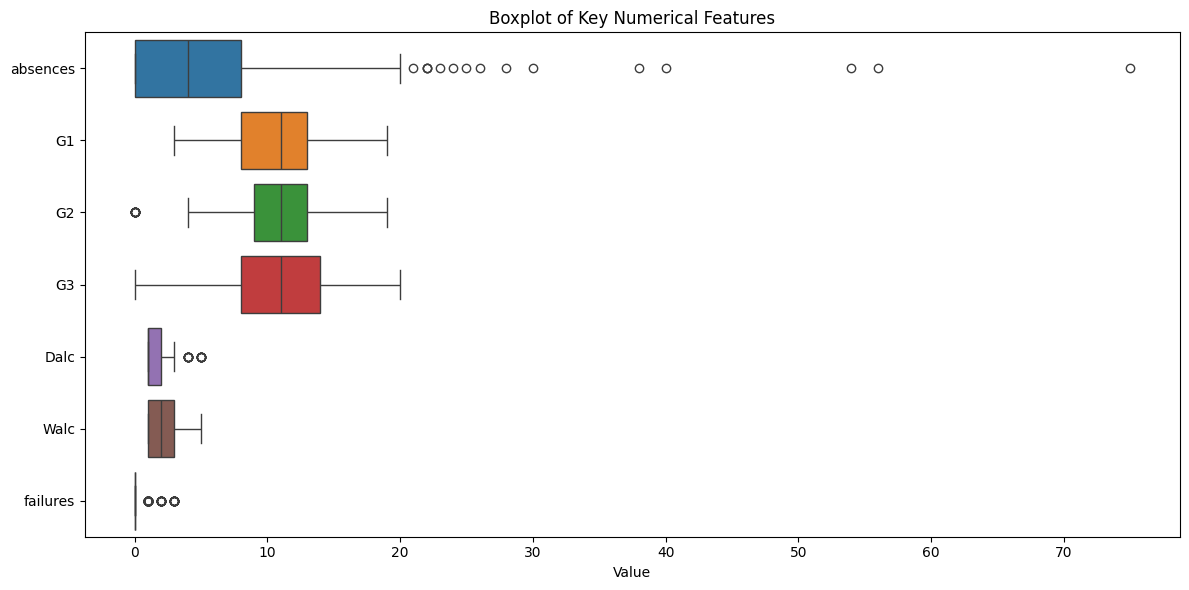

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

# Colonnes à analyser pour détecter les outliers

columns_to_plot = ['absences', 'G1', 'G2', 'G3', 'Dalc', 'Walc', 'failures']

# Créer les boxplots

plt.figure(figsize=(12, 6))

sns.boxplot(data=df[columns_to_plot], orient='h')

plt.title('Boxplot of Key Numerical Features')

plt.xlabel('Value')

plt.tight_layout()

plt.show()




**Step 4: Visualizing data distributions**
---

**Correlation Heatmap (Numeric Only) & **

<ipython-input-9-b802a1d261bd>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='performance_level', data=df, palette='Set2')


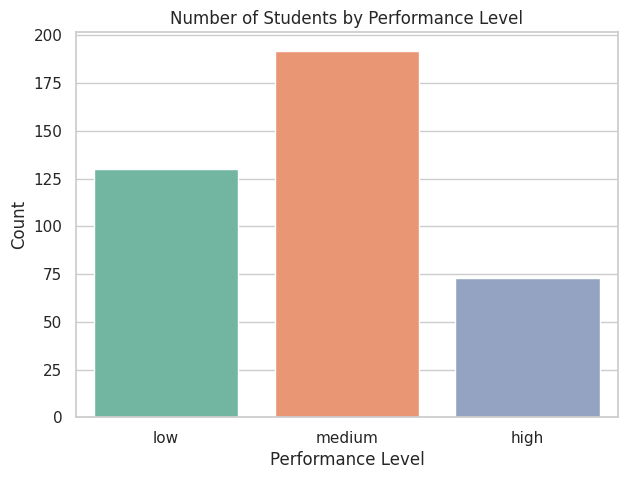

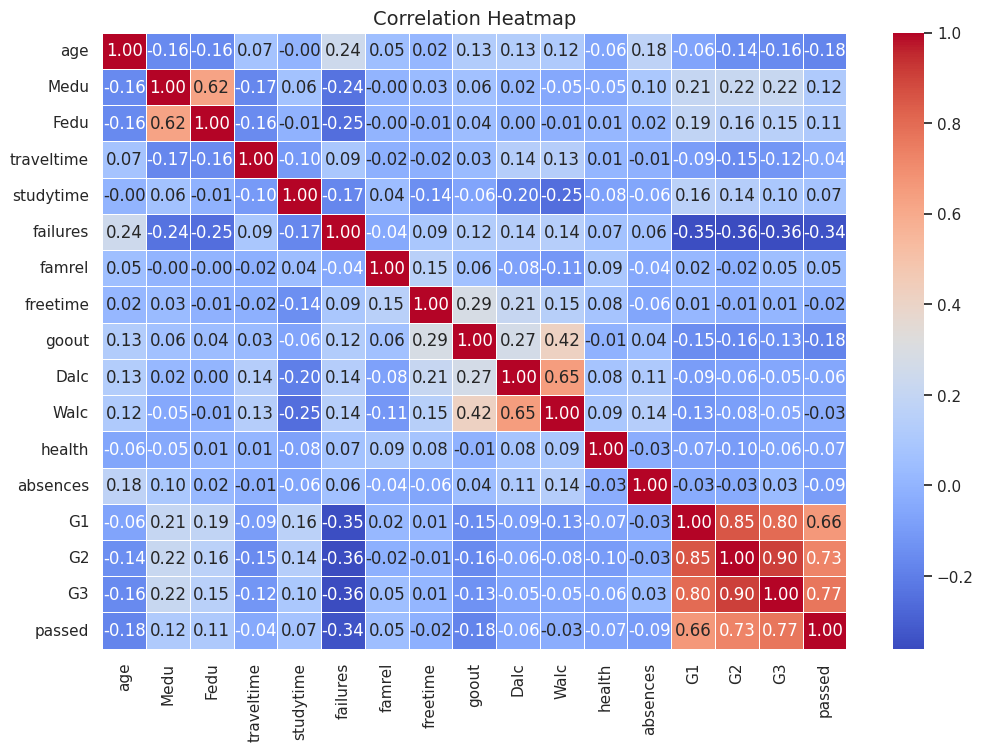

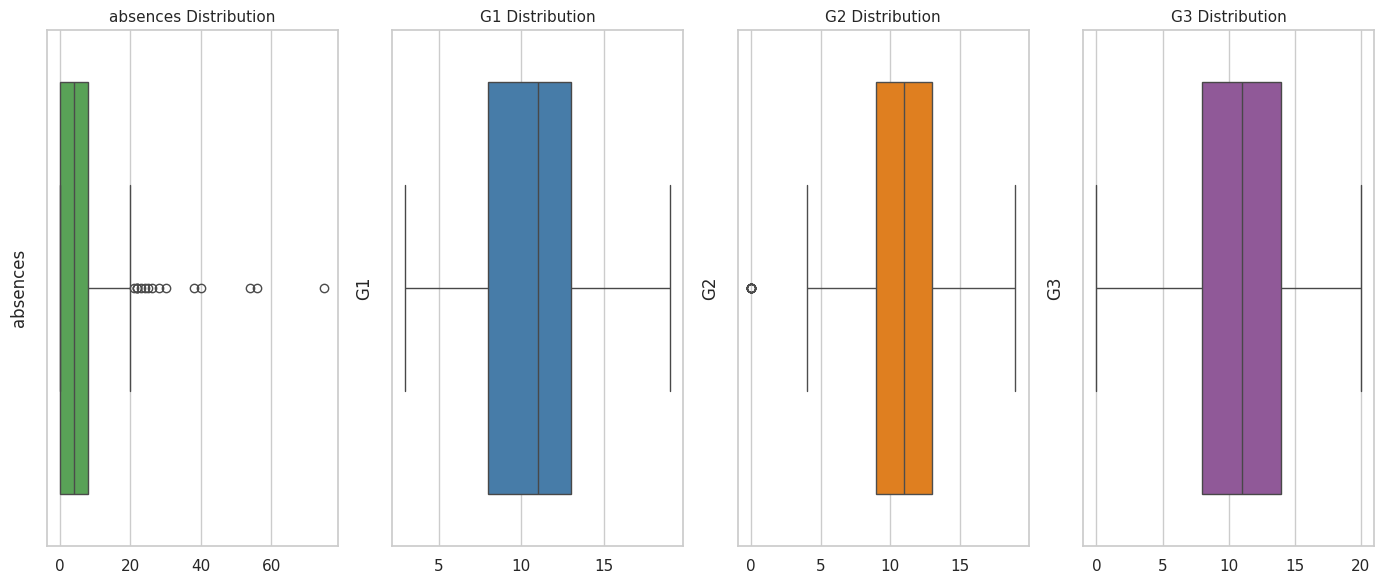

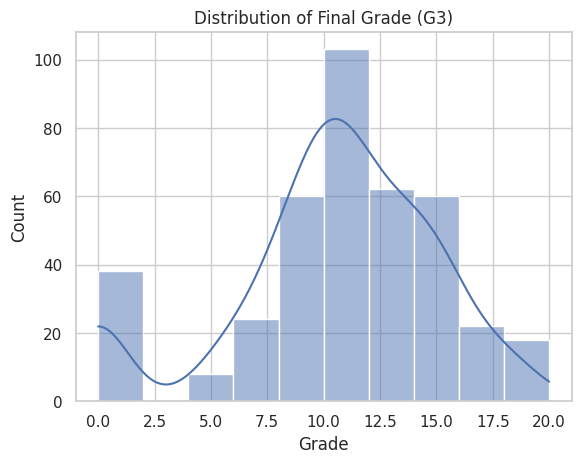

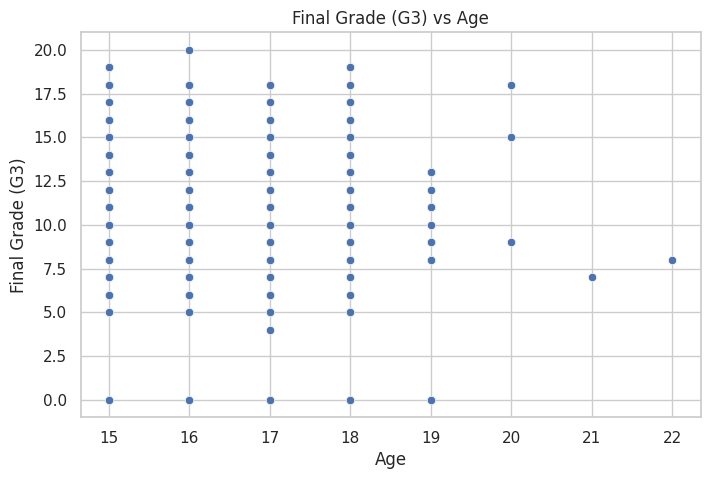

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Recreate performance_level
def classify_performance(g3):
    if g3 <= 9:
        return 'low'
    elif 10 <= g3 <= 14:
        return 'medium'
    else:
        return 'high'

df['performance_level'] = df['G3'].apply(classify_performance)

# Set up Seaborn style
sns.set(style="whitegrid")

# ----------------------------------------
# Visualization 1: Performance Level Counts
# ----------------------------------------
plt.figure(figsize=(7, 5))
sns.countplot(x='performance_level', data=df, palette='Set2')
plt.title('Number of Students by Performance Level')
plt.xlabel('Performance Level')
plt.ylabel('Count')
plt.show()


# ----------------------------------------
# Correlation Heatmap
# ----------------------------------------
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


# ----------------------------------------
# 📦 1. Horizontal Boxplots (Colorful)
# ----------------------------------------
plt.figure(figsize=(14, 6))
colors = ['#4daf4a', '#377eb8', '#ff7f00', '#984ea3']

for i, col in enumerate(['absences', 'G1', 'G2', 'G3']):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(f'{col} Distribution', fontsize=11)
    plt.xlabel('')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

#Histogram of Final Grades
sns.histplot(df['G3'], bins=10, kde=True)
plt.title("Distribution of Final Grade (G3)")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

#Age vs Final Grade (G3)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='G3', data=df)

plt.title('Final Grade (G3) vs Age')
plt.xlabel('Age')
plt.ylabel('Final Grade (G3)')
plt.grid(True)
plt.show()

**Step 5 : Data preprocessing**
---

5.a : Handle missing values using appropriate imputation techniques.

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0
